In [4]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
# sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow
# delete anndata
# del sdata.table
# create anndata
# sdata.table = anndata

In [7]:
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [8]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMichiel_othIm_endoSplit_portalLAM.csv"

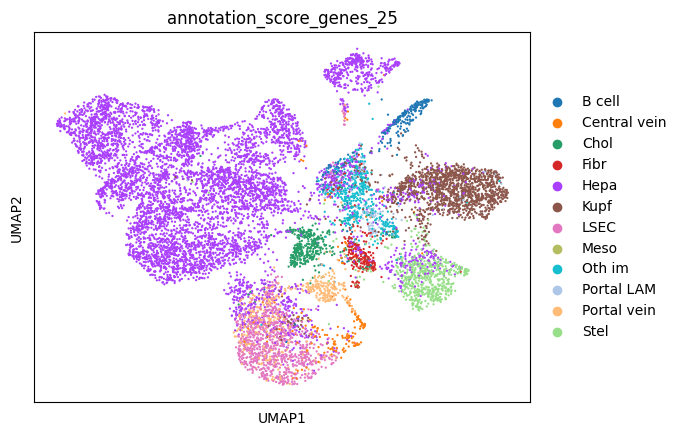

              annotation_score_genes_25
B cell                         2.331168
Central vein                   1.646054
Chol                           3.203132
Fibr                           1.993060
Hepa                          55.734496
Kupf                          12.225287
LSEC                           8.248065
Meso                           0.008898
Oth im                         3.977222
Portal LAM                     1.058813
Portal vein                    4.181867
Stel                           5.391939


In [5]:
# Original score_genes (sdata necessary, still have to make anndata compatible)
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa            55.272533
LSEC            11.970075
Portal LAM       9.137870
Stel             7.018169
Kupf             5.717848
Oth im           1.861418
Portal vein      1.816886
B cell           1.772355
Fibr             1.585322
Unknown          1.380477
Chol             1.344852
Meso             0.819380
Central vein     0.302814
Name: annotation_own_score_genes, dtype: float64


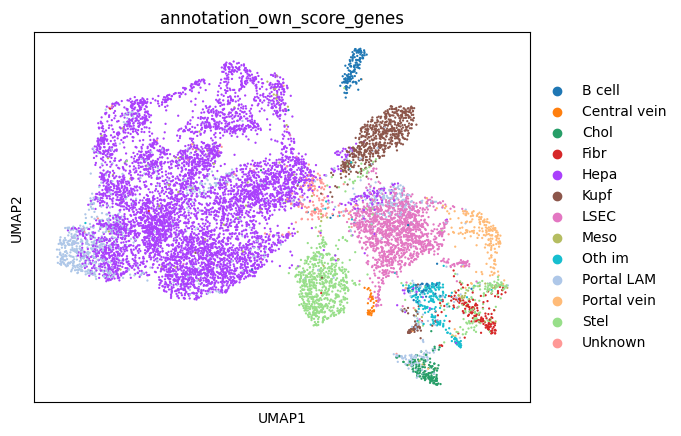

11.444602778767367


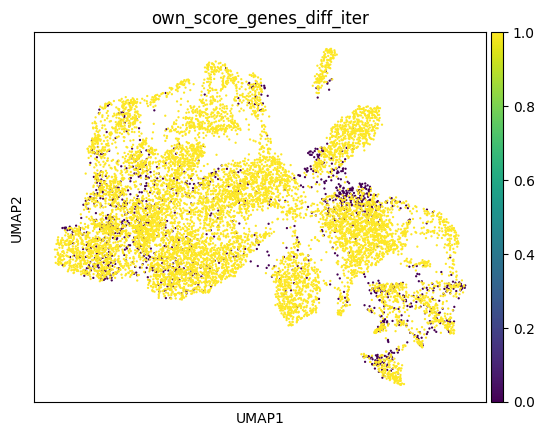

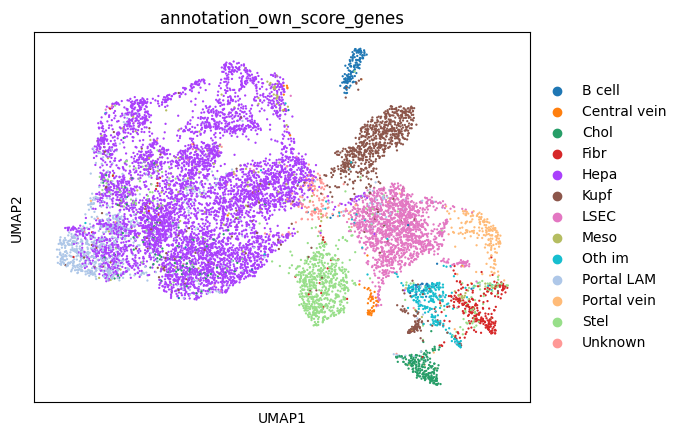

Hepa            50.792661
LSEC            13.056644
Kupf             7.980050
Portal LAM       7.062700
Stel             6.929106
Chol             2.814393
Fibr             2.565016
Oth im           2.395796
Portal vein      1.745636
B cell           1.585322
Unknown          1.380477
Meso             1.237976
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
4.0790879942999645


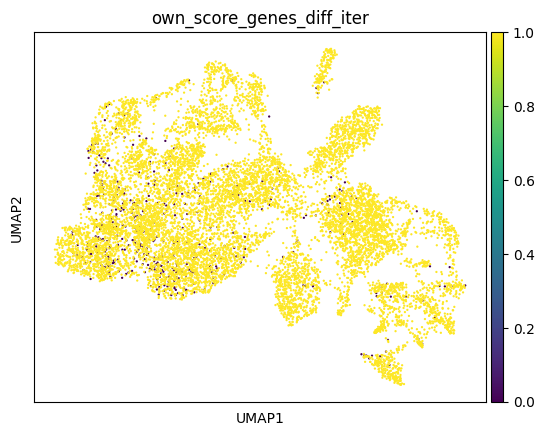

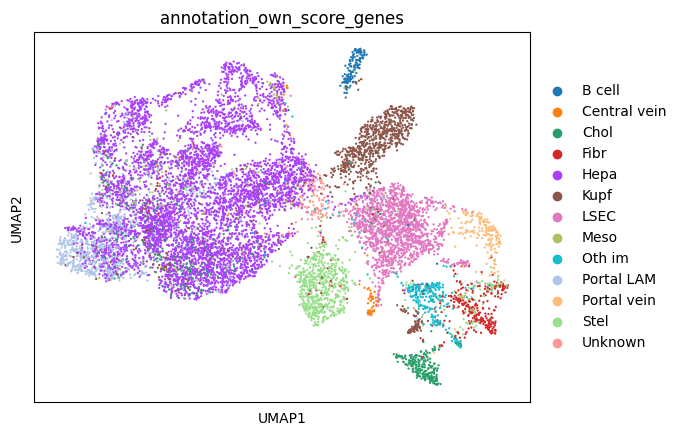

Hepa            47.826861
LSEC            13.136801
Kupf             8.852868
Portal LAM       7.258639
Stel             7.044888
Chol             4.292839
Fibr             2.743142
Oth im           2.547203
Portal vein      1.710011
B cell           1.496259
Unknown          1.380477
Meso             1.255789
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
2.484859280370502


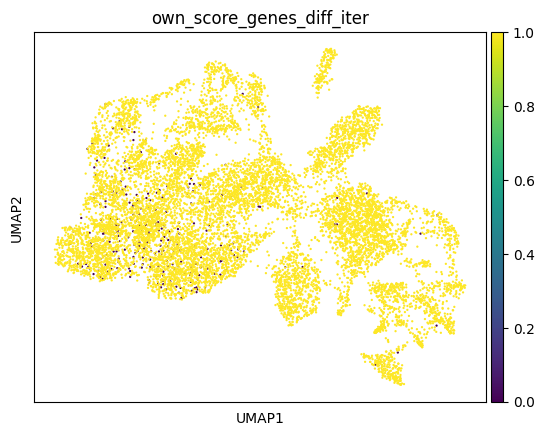

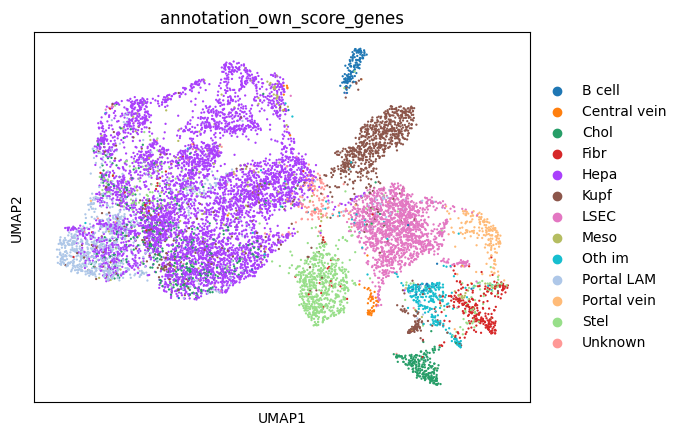

Hepa            45.502316
LSEC            13.136801
Kupf             9.084432
Portal LAM       7.837549
Stel             7.133951
Chol             5.682223
Fibr             2.787674
Oth im           2.591735
Portal vein      1.674385
B cell           1.496259
Unknown          1.380477
Meso             1.237976
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
1.4250089063056643


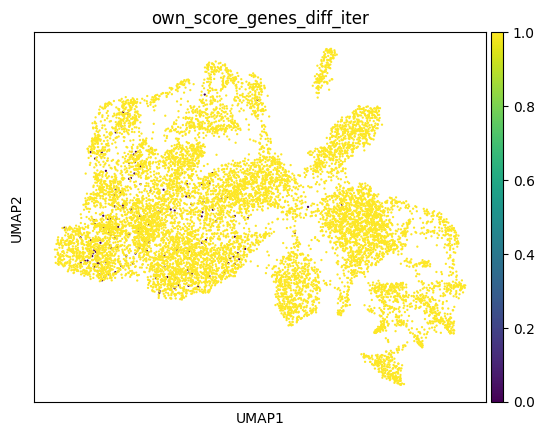

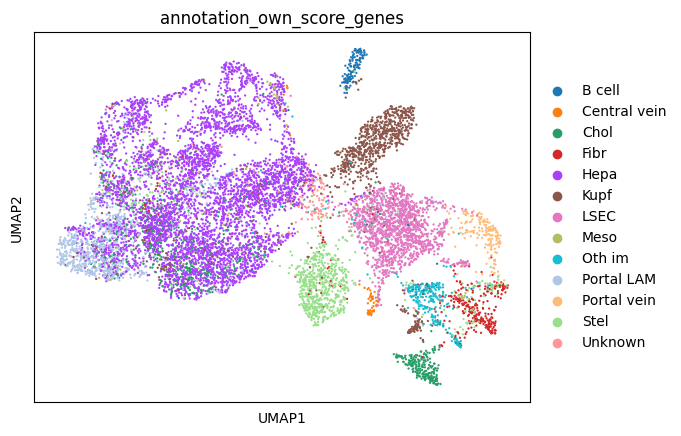

Hepa            44.166370
LSEC            13.136801
Kupf             9.128963
Portal LAM       8.505522
Stel             7.151763
Chol             6.296758
Fibr             2.796580
Oth im           2.600641
Portal vein      1.665479
B cell           1.496259
Unknown          1.380477
Meso             1.220164
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
0.4720342002137513


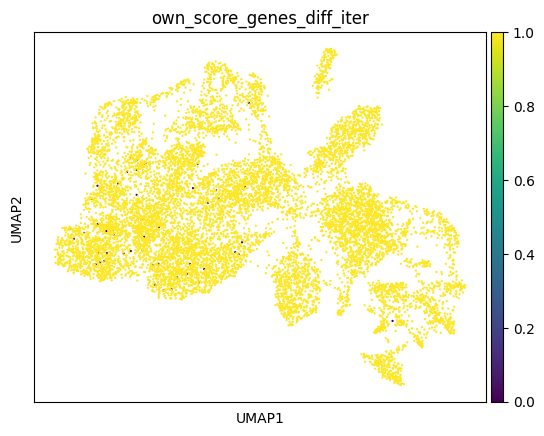

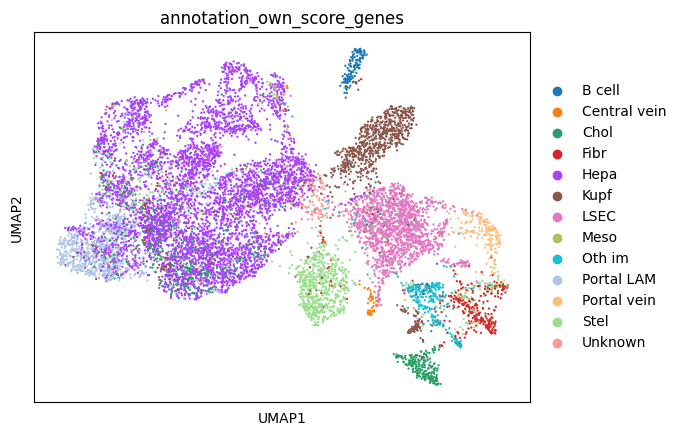

Hepa            43.729961
LSEC            13.145707
Kupf             9.128963
Portal LAM       8.710367
Stel             7.142857
Chol             6.537228
Fibr             2.796580
Oth im           2.609548
Portal vein      1.656573
B cell           1.496259
Unknown          1.380477
Meso             1.211258
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
0.14250089063056642


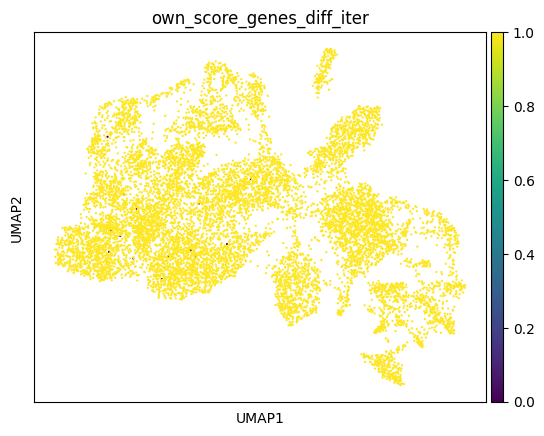

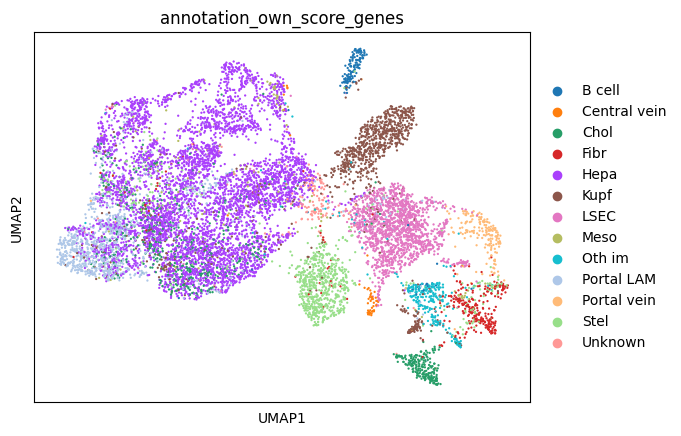

Hepa            43.614179
LSEC            13.145707
Kupf             9.128963
Portal LAM       8.719273
Stel             7.133951
Chol             6.653010
Fibr             2.796580
Oth im           2.609548
Portal vein      1.656573
B cell           1.496259
Unknown          1.380477
Meso             1.211258
Central vein     0.454222
Name: annotation_own_score_genes, dtype: float64
0.04453152832205201
converged


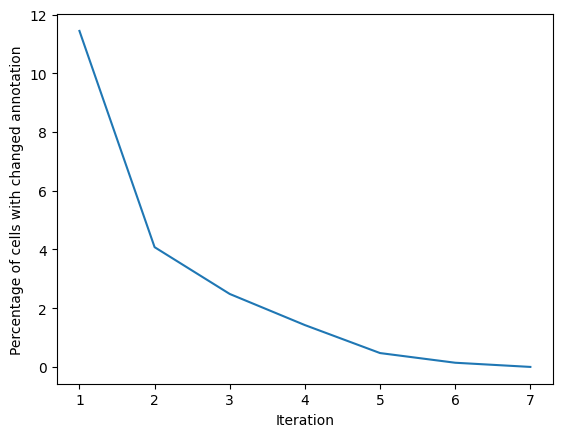

In [9]:
# Own score genes iterative
scores = own_score_genes_iterative(anndata,path_mg,nr_iterations=8,output_dir=OUTPUT_DIR)

Hepa            10.0
LSEC            20.0
Portal vein     14.0
Central vein    16.0
Chol            14.0
Kupf            25.0
Stel            24.0
Fibr            24.0
B cell          13.0
Meso            14.0
Portal LAM      15.0
Oth im           4.0
dtype: float64


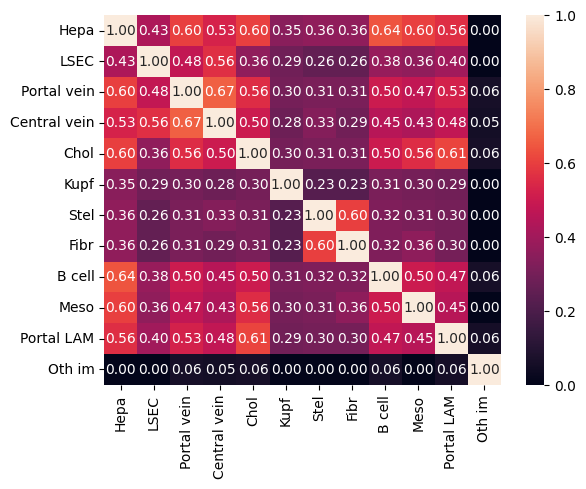

In [10]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

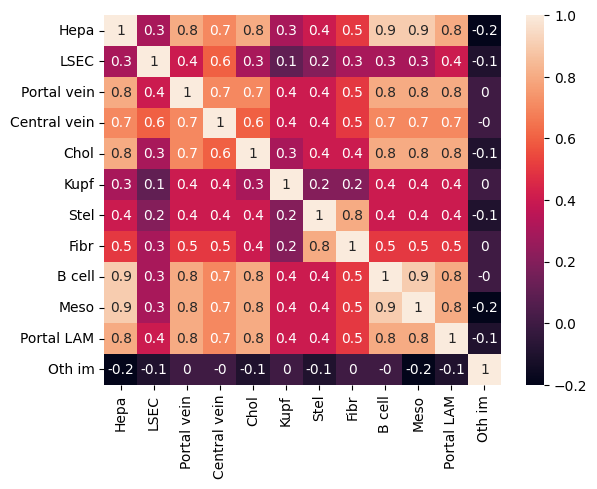

In [11]:
# plot correlation matrix of the features
sns.heatmap(np.round(scores.corr(method='pearson'),1), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

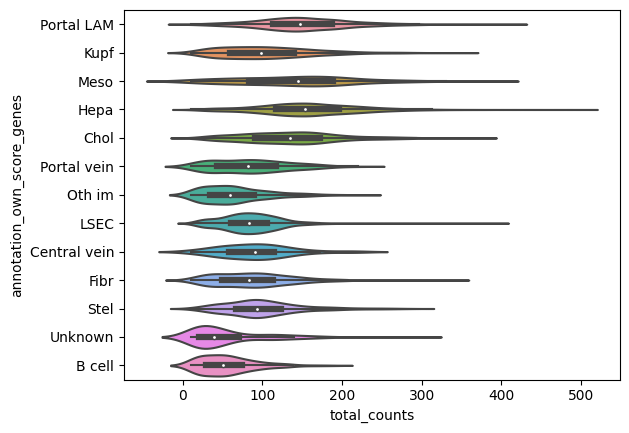

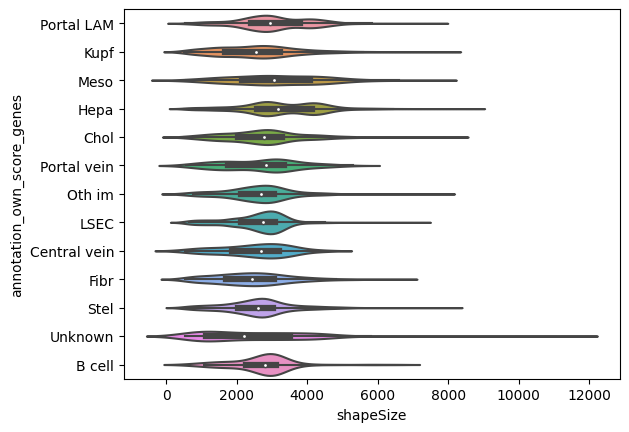

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

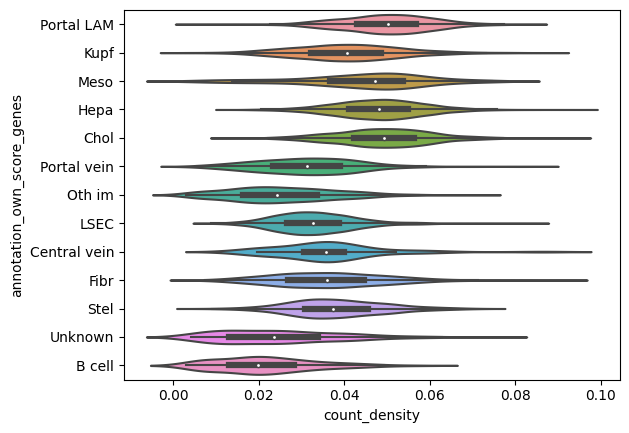

In [12]:
sns.violinplot(data=anndata.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=anndata.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
anndata.obs['count_density'] = anndata.obs['total_counts'] / anndata.obs['shapeSize']
sns.violinplot(data=anndata.obs,x="count_density",y="annotation_own_score_genes")

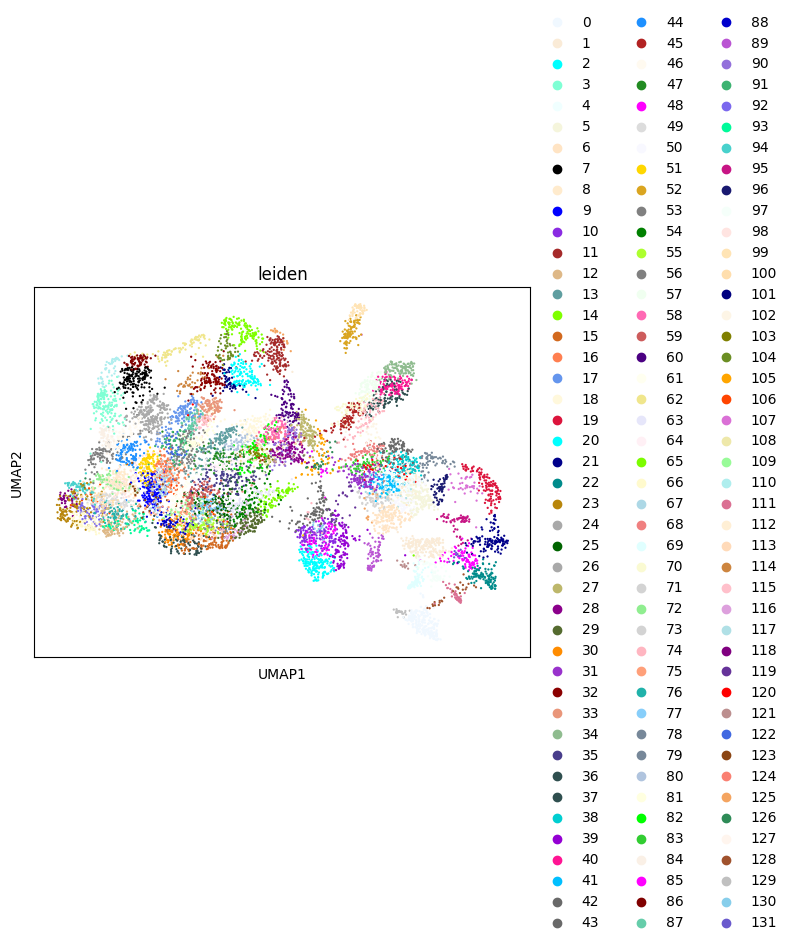

In [13]:
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Hepa
[(3, 0.68, 157), (7, 0.78, 148), (9, 0.69, 144), (11, 0.8, 144), (13, 0.65, 130), (14, 0.98, 129), (15, 0.65, 128), (16, 0.79, 125), (17, 0.78, 120), (18, 0.82, 119), (20, 0.97, 118), (24, 0.72, 115), (25, 0.91, 115), (26, 0.76, 115), (27, 0.69, 114), (28, 0.82, 114), (29, 0.9, 113), (30, 0.72, 113), (32, 0.98, 112), (33, 0.92, 110), (35, 0.83, 109), (36, 0.66, 105), (46, 0.8, 99), (47, 0.92, 99), (51, 0.55, 94), (53, 0.88, 93), (54, 0.59, 93), (58, 0.96, 89), (59, 0.91, 88), (60, 0.95, 87), (61, 0.71, 86), (62, 0.94, 86), (63, 0.86, 86), (64, 0.84, 85), (65, 0.87, 85), (67, 0.79, 84), (72, 0.63, 78), (73, 0.78, 77), (75, 0.62, 76), (77, 0.88, 75), (79, 0.68, 72), (80, 0.97, 72), (81, 0.57, 72), (82, 0.77, 70), (86, 0.97, 68), (87, 0.94, 67), (90, 0.97, 66), (91, 0.77, 66), (94, 0.7, 63), (101, 0.98, 54), (103, 0.88, 52), (104, 0.98, 51), (108, 0.94, 48), (109, 0.87, 47), (110, 0.76, 45), (113, 0.95, 42), (114, 0.95, 41), (115, 0.95, 40), (116, 0.95, 39), (122, 0.83, 35), (124, 0.

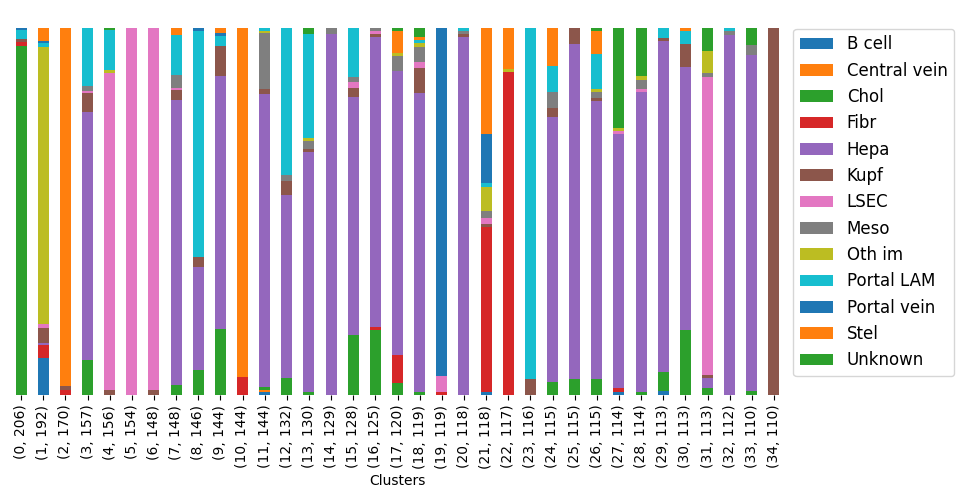

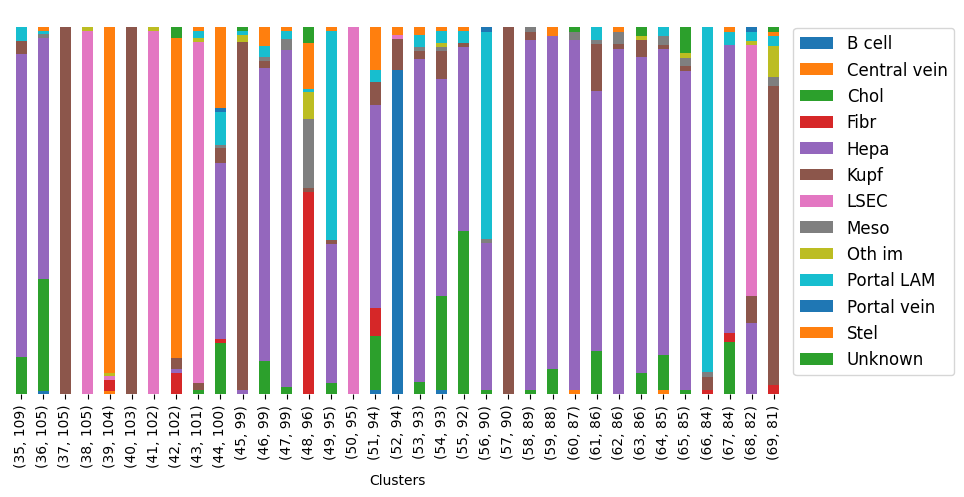

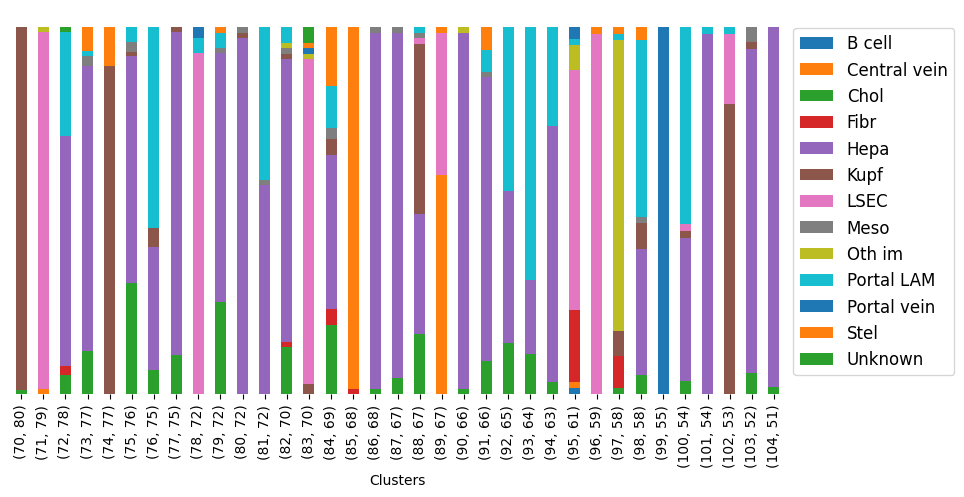

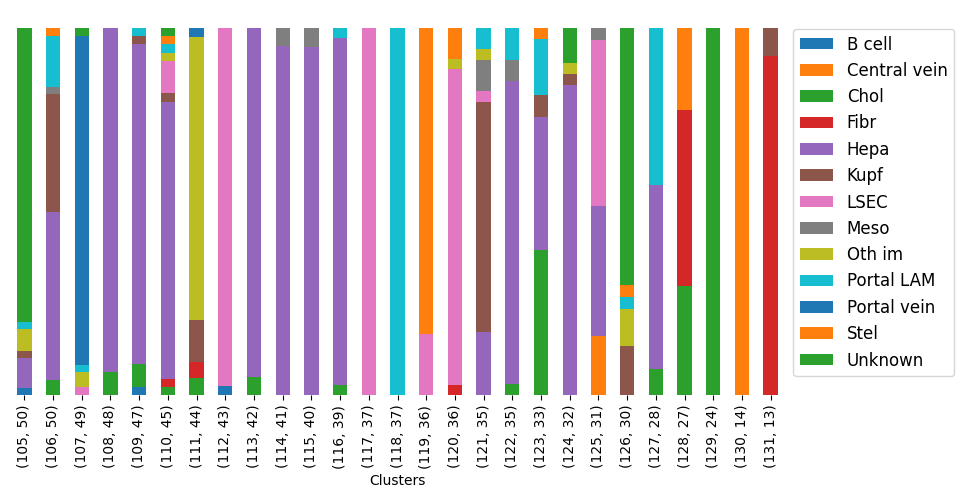

In [14]:
cell_types = ['Hepa','Kupf','LSEC','Central vein','Portal vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown','Portal LAM']
leiden_clusters_per_ct = clusteringVSleiden(anndata, "annotation_own_score_genes", "leiden",cell_types)

In [15]:
a = anndata.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
anndata.obs['leiden_cell_types'] = a
print(anndata.obs['leiden_cell_types'].value_counts())


0      206
1      192
2      170
3      157
4      156
      ... 
127     28
128     27
129     24
130     14
131     13
Name: leiden_cell_types, Length: 132, dtype: int64


In [16]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(anndata,cell_types,leiden_clusters_per_ct,path_mg,10,1,OUTPUT_DIR)

0


IndexError: arrays used as indices must be of integer (or boolean) type

91
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Cd5l
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec4f
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['B cell']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'LSEC', 'Portal LAM']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['LSEC', 'Central vein', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol', 'Portal LAM']
F13a1
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Itgax
Is marker gene of: ['Oth im']
Could also be a marker gene of: ['Portal LAM']
Itgb7
Is marker gene of: ['B cell', 'Oth im']
Could also be a marker gene of: ['Por

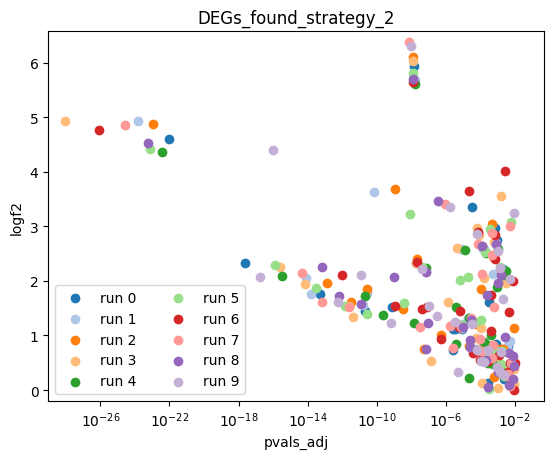

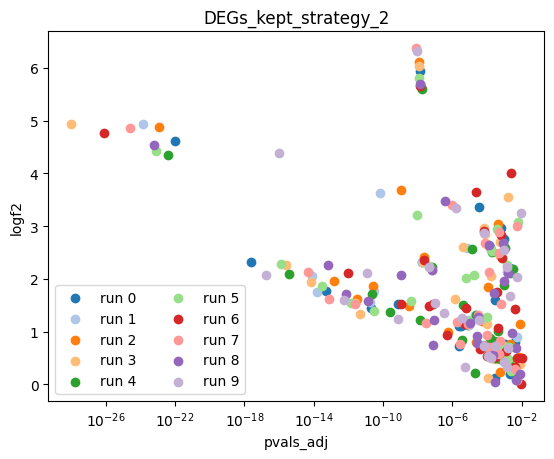

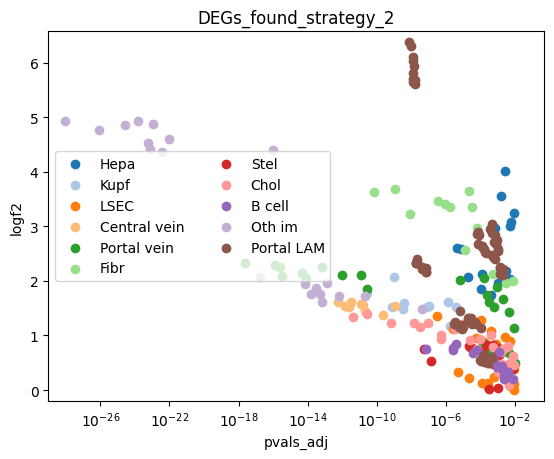

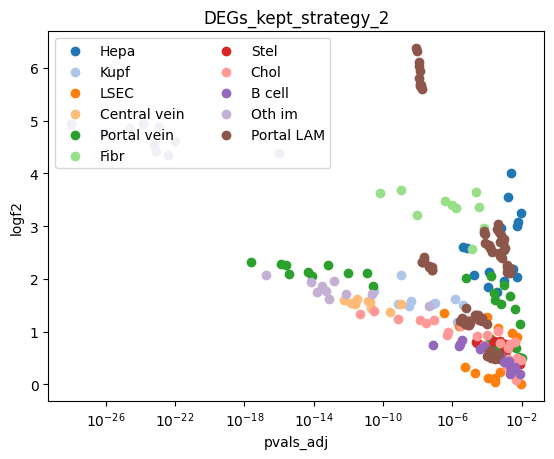

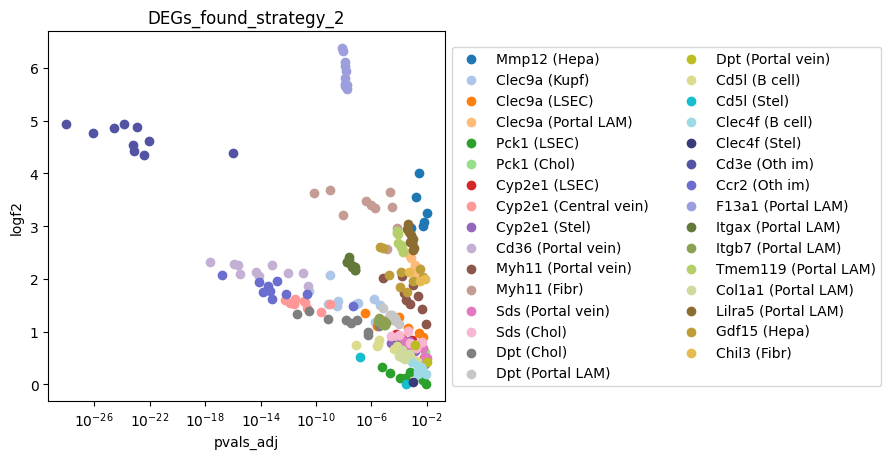

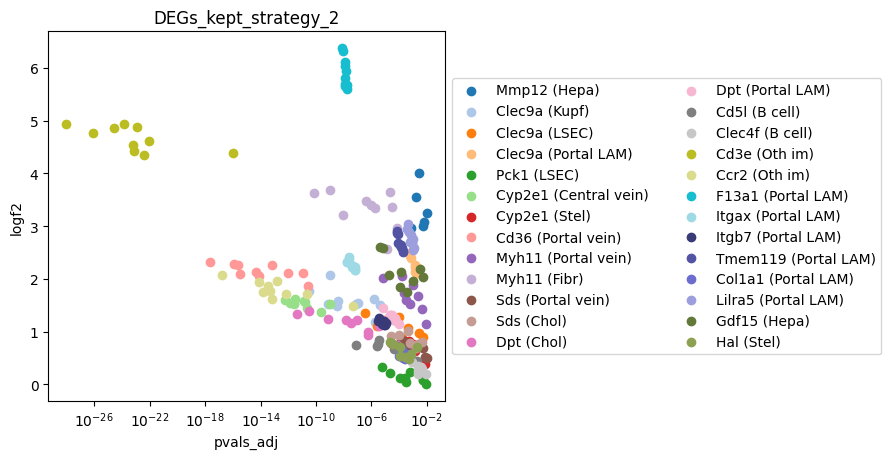

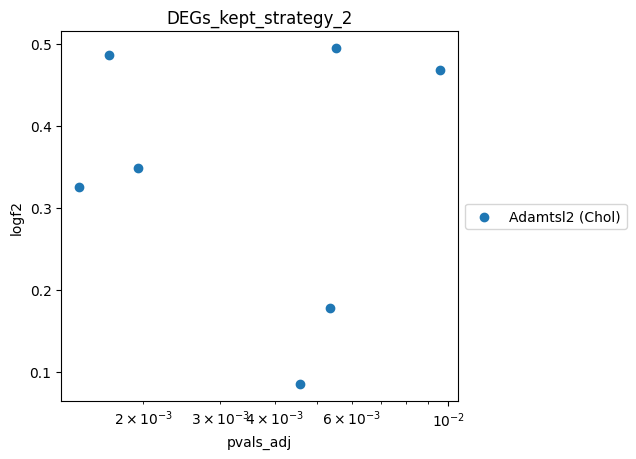

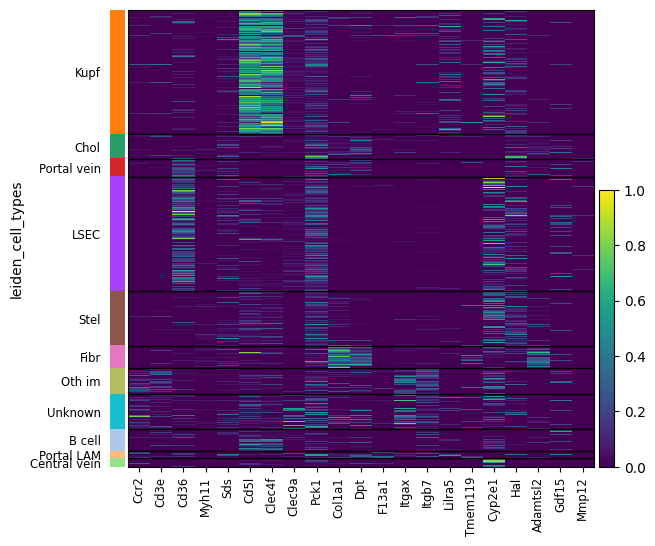

In [ ]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(anndata,cell_types,leiden_clusters_per_ct,path_mg,10,2,OUTPUT_DIR)

In [ ]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
path_mg_mod_1_2 = OUTPUT_DIR + "/markerGeneListHL_othIm_endoSplit_portalLAM_modified_1_2.csv"
df_mg.to_csv(path_mg_mod_1_2)

In [ ]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa             9.002
LSEC            10.833
Portal vein      9.000
Central vein     9.500
Chol             9.500
Kupf            18.000
Stel            17.001
Fibr            16.500
B cell           6.500
Meso             6.000
Portal LAM      19.500
Oth im           5.000
dtype: float64


Hepa            49.506184
LSEC            14.013702
Kupf            12.945992
Stel             6.717680
Oth im           4.199662
Chol             2.793843
Fibr             2.615891
B cell           2.589198
Portal vein      1.788415
Portal LAM       1.521488
Central vein     1.112199
Meso             0.177952
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64


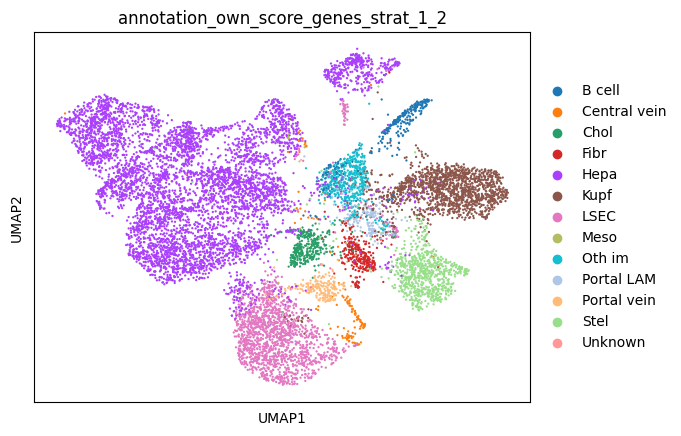

5.258474953287659


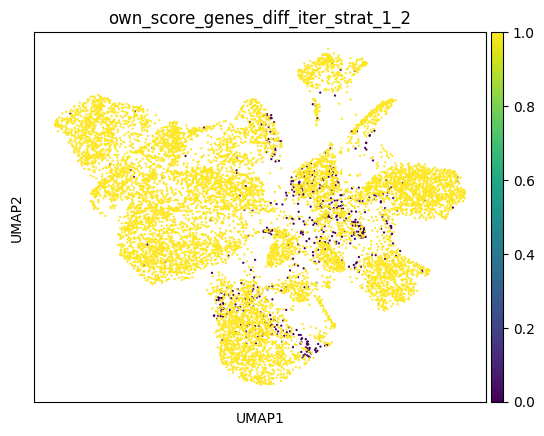

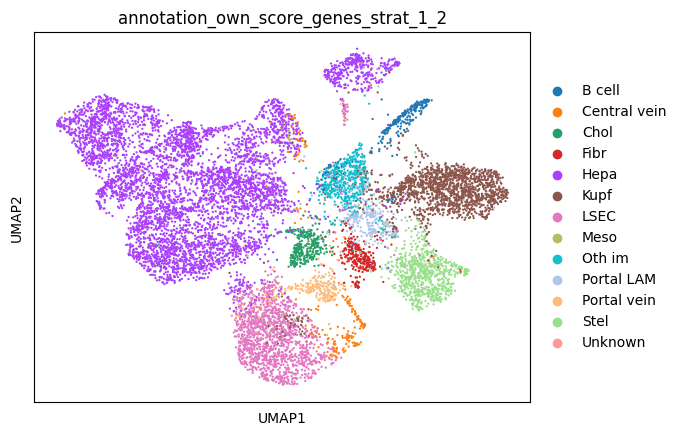

Hepa            47.815642
Kupf            13.711184
LSEC            12.634576
Stel             6.655396
Oth im           4.315331
Chol             2.793843
Portal LAM       2.749355
Fibr             2.518018
B cell           2.402349
Portal vein      2.322271
Central vein     1.815108
Meso             0.249132
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
1.112198594180977


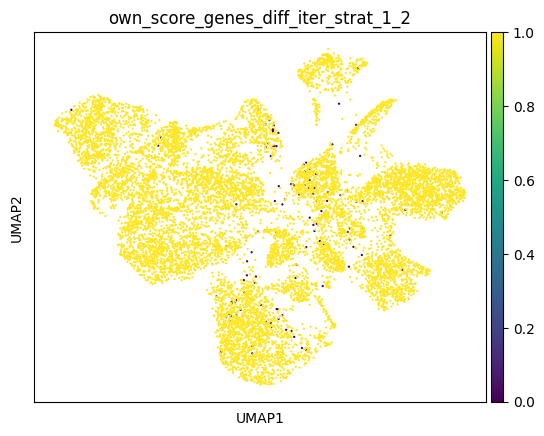

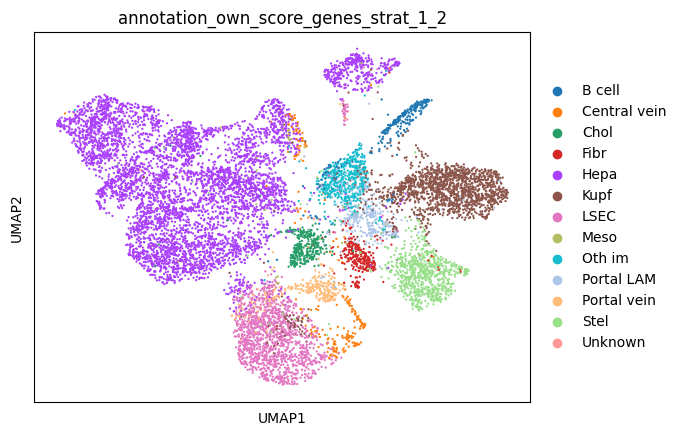

Hepa            47.450841
Kupf            13.711184
LSEC            12.323160
Stel             6.664294
Oth im           4.270843
Portal LAM       3.060771
Chol             2.811638
Fibr             2.526915
Portal vein      2.437939
B cell           2.375656
Central vein     2.046445
Meso             0.302518
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.24913248509653885


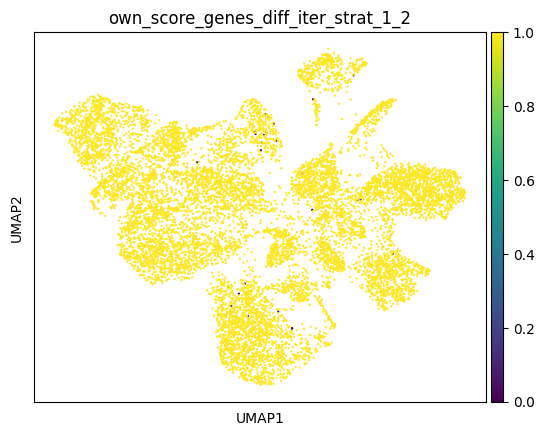

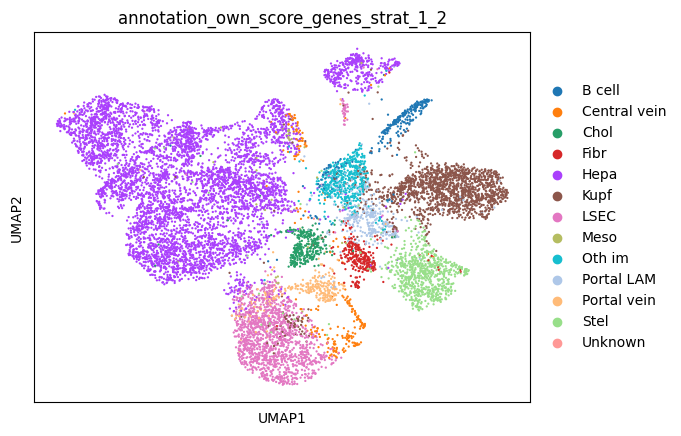

Hepa            47.308479
Kupf            13.728979
LSEC            12.278672
Stel             6.664294
Oth im           4.288638
Portal LAM       3.069668
Chol             2.811638
Fibr             2.518018
Portal vein      2.473530
B cell           2.348963
Central vein     2.135421
Meso             0.355904
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.08007829878103034


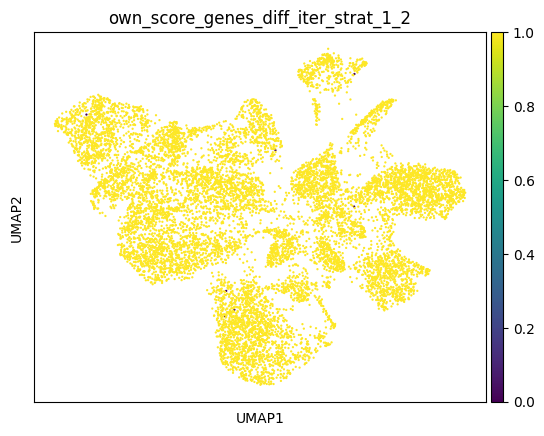

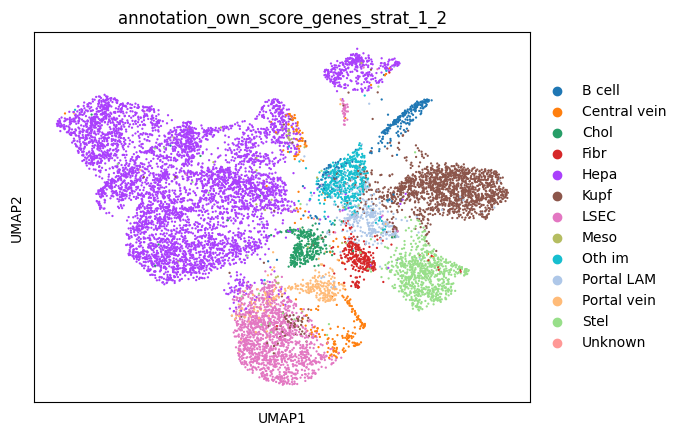

Hepa            47.255094
Kupf            13.737877
LSEC            12.269775
Stel             6.664294
Oth im           4.288638
Portal LAM       3.060771
Chol             2.829433
Fibr             2.526915
Portal vein      2.500222
B cell           2.348963
Central vein     2.144319
Meso             0.355904
Unknown          0.017795
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.0
converged


Hepa      LSEC  Portal vein  Central vein       Chol      Kupf  \
0     -0.452787  4.960516    -0.018889      0.588939  -0.999110 -2.223866   
1      4.554073       NaN    -3.447957           NaN   0.305412       NaN   
2      5.992206 -0.483299          NaN     -1.564368  -0.242321       NaN   
3           NaN       NaN          NaN           NaN        NaN  6.276423   
4           NaN -1.015118    -0.961153     -3.441610        NaN -4.901971   
...         ...       ...          ...           ...        ...       ...   
11234  3.160986       NaN    -0.357533     -2.422165  21.908923 -2.816261   
11235  0.847577       NaN    -3.903296           NaN  -2.770071  7.719606   
11236  9.523800 -1.946474    -3.291127           NaN   2.692112       NaN   
11237  3.136051  8.463529    11.648724      0.256156   4.376771 -0.120679   
11238  7.878618 -2.403404    -1.605592           NaN   1.715827       NaN   

            Stel       Fibr    B cell      Meso  Portal LAM  Oth im  
0      -1.162341        NaN -2.288918       NaN   -5.755031     NaN  
1      -3.500818        NaN       NaN       NaN         NaN     NaN  
2            NaN        NaN       NaN       NaN         NaN     NaN  
3      -3.950790        NaN  2.041329       NaN   -1.689285     NaN  
4            NaN  -6.029582 -2.180089       NaN   -6.647977     NaN  
...          ...        ...       ...       ...         ...     ...  
11234  -2.089415   6.629604       NaN  4.174031    7.648025     NaN  
11235  10.283596  22.939892 -1.686598  1.154686    6.982920     NaN  
11236   2.233016  -4.605781       NaN       NaN         NaN     NaN  
11237   0.928307  -5.412163 -1.116445 -1.175146   -4.676462     NaN  
11238  -4.152231        NaN       NaN       NaN   -4.576656     NaN  

[11239 rows x 12 columns]

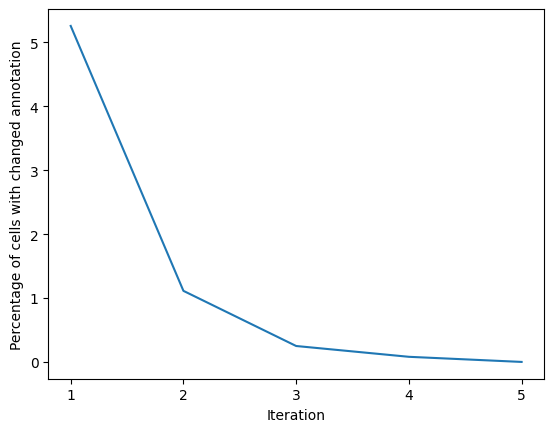

In [ ]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(anndata,path_mg_mod_1_2,nr_iterations=8,suffix='_strat_1_2',output_dir=OUTPUT_DIR)

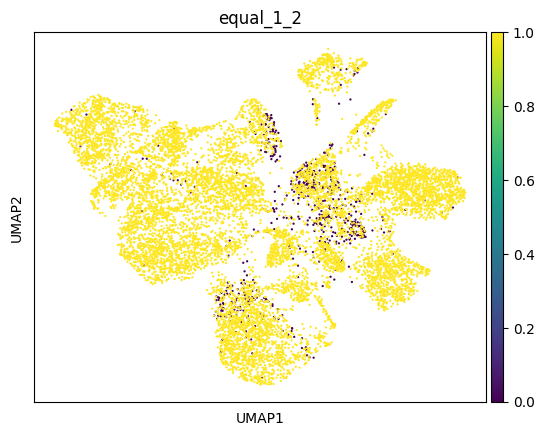

In [ ]:
l = [anndata.obs['annotation_own_score_genes'].to_list()[i] == anndata.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(anndata.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
anndata.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(anndata,color=['equal_1_2'])

In [ ]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'annotation_own_score_genes_start_iterative',
       'annotation_own_score_genes', 'count_density', 'leiden_cell_types',
       'score_celltype_own_score_genes_strat_1_2',
       'second_score_celltype_own_score_genes_strat_1_2',
       'cleanliness_own_score_genes_strat_1_2',
       'annotation_own_score_genes_start_iterative_strat_1_2',
       'annotation_own_score_genes_strat_1_2', 'equal_1_2'],
      dtype='object')

In [ ]:
anndata.write_h5ad(OUTPUT_DIR+'/'+name_anndata+'_it_score_genes_Michiel.h5ad')